In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [3]:
from pandas.tseries.offsets import MonthEnd

In [4]:
%store -r x
%store -r sector_beat_spx

In [5]:
x.head()

,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,UMCSENT,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
2000-12-31,0.003422,0.013672,0.003953,-0.000188,-0.164179,0.0640,-0.026502,0.004399,0.039,-0.037602,...,0.00016,-0.023508,-0.015846,0.051844,-0.009052,-0.019350,-0.142559,0.012806,0.034,0.071585
2001-01-31,0.012396,-0.052023,0.003845,0.000543,-0.428571,0.0598,-0.082609,0.002782,0.042,-0.043295,...,0.00542,0.004890,-0.015331,-0.008686,-0.010151,-0.016498,0.000000,0.013281,0.050,0.000000
2001-02-28,0.012396,0.002033,0.006932,-0.000203,1.125000,0.0549,-0.082609,-0.001024,0.042,0.009934,...,0.00506,-0.034438,-0.005694,-0.013302,-0.007551,-0.010214,0.000000,0.013768,0.039,0.000000
2001-03-31,0.012396,0.085193,0.007699,-0.002109,-0.294118,0.0531,-0.082609,0.002008,0.043,-0.033880,...,0.00737,0.023648,-0.005771,-0.045668,-0.011346,-0.004568,0.027795,0.014308,0.035,-0.012309
2001-04-30,0.000104,0.014953,0.008539,-0.000294,-0.083333,0.0480,0.020413,0.006666,0.044,0.040724,...,0.01062,0.006817,-0.001386,0.013908,-0.012398,0.007553,0.000000,0.014916,0.038,0.000000


In [6]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
dir_str = '/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/'

In [8]:
def read_bl_file(file_name,sheet):
    data = pd.read_excel(file_name,sheet)
    measure_name = str(data.iloc[:,[0]].columns.values[0])
    tickers = map(str,data.iloc[[0],:].T.dropna().values.flatten())
    values = data.iloc[:,1::3]
    values = values.iloc[2:,:]
    values.columns = tickers
    
    dates = data.iloc[:,::3]
    dates = dates.iloc[2:,:]
    dates.columns = tickers
    
    out_df = pd.DataFrame()
    for ticker in tickers:
        temp = pd.DataFrame(values.loc[:,ticker].values,index = dates.loc[:,ticker],columns =[ticker]).dropna()
        if len(temp)>=204:
            out_df = pd.concat([out_df,temp],1)
        else:
            pass
    out_df.index.name = measure_name
    return out_df.dropna()

In [9]:
pe_ratio = read_bl_file(dir_str+'fin_ind_data.xlsx',0)
last_price = read_bl_file(dir_str+'fin_ind_data.xlsx',1)
mkt_cap = read_bl_file(dir_str+'fin_ind_data.xlsx',2)
pc_ratio = read_bl_file(dir_str+'fin_ind_data.xlsx',3)

In [1]:
def return_function(df):
    if type(df)!=pd.DataFrame:
        df = pd.DataFrame(df)
    out_df = (df.shift(-1)-df)/df
    return out_df
def momentum_calculation(dataframe):
    if type(dataframe) != pd.DataFrame:
        dataframe = pd.DataFrame(dataframe)
    out_df = dataframe.shift(12) - dataframe.shift(1)
    return out_df

In [40]:
len(last_price.columns)

50

In [12]:
price_momentum = momentum_calculation(last_price).dropna()

In [13]:
%store price_momentum

Stored 'price_momentum' (DataFrame)


In [33]:
asset_returns = return_function(last_price)

In [34]:
assets_momentum = momentum_calculation(asset_returns).dropna()

In [44]:
market_weights = mkt_cap.div(mkt_cap.apply(np.sum,1),axis = 0).loc[:,last_price.columns]

In [78]:
equal_weight_momentum = pd.DataFrame(assets_momentum.apply(np.mean,1),columns = ['eqaul_weight_momentum'])
market_cap_weight_momentum = assets_momentum.multiply(market_weights)
market_cap_weight_momentum = pd.DataFrame(market_cap_weight_momentum.apply(np.mean,1),columns = ['market_cap_weight_momentum']).dropna()

equal_weight_momentum = equal_weight_momentum.resample("M").last()
market_cap_weight_momentum = market_cap_weight_momentum.resample("M").last()

equal_weight_momentum = equal_weight_momentum.fillna(method='backfill')
market_cap_weight_momentum = market_cap_weight_momentum.fillna(method='backfill')

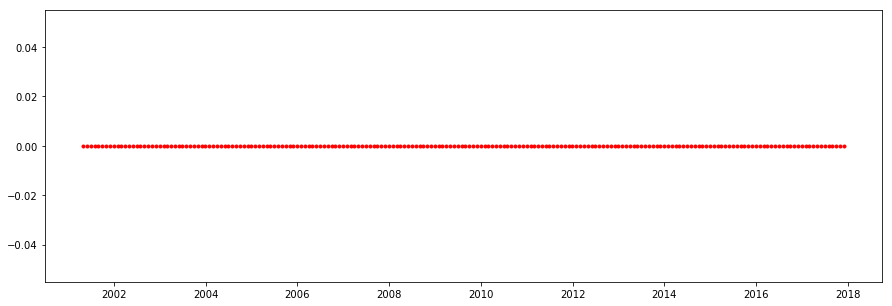

In [79]:
plt.figure(figsize = (15,5))
plt.plot(market_cap_weight_momentum.index,np.repeat(0,len(market_cap_weight_momentum.index)),'r.')
plt.show()

In [80]:
%store equal_weight_momentum
%store market_cap_weight_momentum

Stored 'equal_weight_momentum' (DataFrame)
Stored 'market_cap_weight_momentum' (DataFrame)


In [38]:
market_cap_weight_momentum

,AFL UN Equity,AIG UN Equity,AJG UN Equity,ALL UN Equity,AMG UN Equity,AON UN Equity,AXP UN Equity,BAC UN Equity,BBT UN Equity,BEN UN Equity,...,STI UN Equity,STT UN Equity,TMK UN Equity,TROW UW Equity,TRV UN Equity,UNM UN Equity,USB UN Equity,WFC UN Equity,XL UN Equity,ZION UW Equity
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


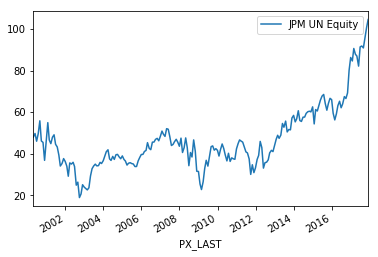

In [20]:
last_price.iloc[:,[1]].plot()

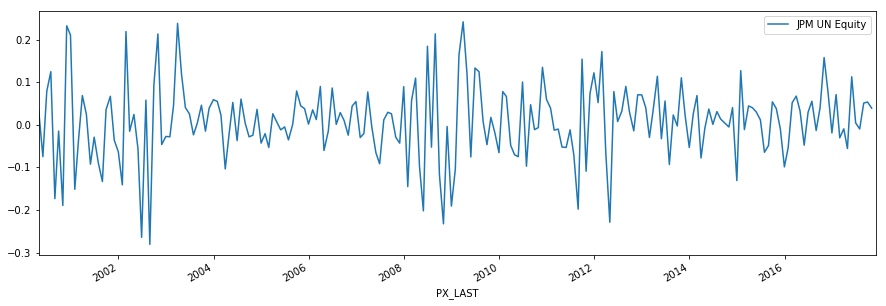

In [18]:
temp.plot(figsize = (15,5))


In [21]:
temp

,JPM UN Equity
PX_LAST,
2000-04-28,0.0364267
2000-05-31,-0.074896
2000-06-30,0.0786974
2000-07-31,0.124528
2000-08-31,-0.173378
2000-09-29,-0.014885
2000-10-31,-0.18956
2000-11-30,0.232203
2000-12-29,0.210234


In [5]:
x,y = model_data(x,sector_beat_spx)

In [6]:
# y = sector_beat_spx

In [7]:
x = (x/np.linalg.norm(x,axis =0))

In [44]:
def nu_svm(nunmber_of_years_lookback,month_forecast,nu_input):
    svm_result_dict = {}
    coef_all_df = pd.DataFrame()
    accuracy_dict = {}
    y_prediction_dict ={}
    number_of_runs = 0.0
    for dt_index in x.index[x.index>=x.index.min()+pd.DateOffset(years = nunmber_of_years_lookback)][:-(month_forecast-1)]:
        begin_index,end_index = dt_index+pd.DateOffset(years = -nunmber_of_years_lookback)+MonthEnd(0),dt_index+MonthEnd(-1)
        selection = (x.index>=begin_index) & (x.index <= end_index)
        spliced_x = x[selection]
        spliced_y = y[selection]

        nu = svm.NuSVC(nu_input)
        nu.fit(spliced_x,spliced_y)

        test_begin_index,test_end_index = dt_index+pd.DateOffset(months=+1)+MonthEnd(-1),dt_index+pd.DateOffset(months=+month_forecast)+MonthEnd(-1)
        test_selection = (x.index>=test_begin_index) & (x.index<=test_end_index)
        test_x = x[test_selection]
        test_y = y[test_selection]
        nu_predict = pd.DataFrame(nu.predict(test_x),index = test_y.index,columns = test_y.columns)

        y_prediction_dict[dt_index] = nu_predict
        accuracy_df = ((nu_predict-test_y)==0)*1
        accuracy_dict[dt_index] = accuracy_df
        number_of_runs +=1
#     print(number_of_runs)

    mean_accuracy_list = []
    for key,value in accuracy_dict.iteritems():
        mean_accuracy_list.append((value.values.flatten()))
    return np.mean(mean_accuracy_list)

1

In [62]:
result_dict ={}
for nu in np.arange(0.1, 0.99, 0.1):
    results_df = pd.DataFrame()
    for years in [3,6,7,9,10]:
        for months in range(3,12+3,3):
            results_df.loc[str(years)+" years",str(months)+" month"] = nu_svm(years,months,float(nu))
    result_dict[nu] = results_df    

ValueError: specified nu is infeasible

In [65]:
# from IPython.display import Image
# dir_str_png = '/home/luke/workspace/Sector-Analysis/R/Graphs/IYW_linear_reg_simple.png'
# Image(filename=dir_str_png) 

In [63]:
for key in np.sort(result_dict.keys()):
    print key
    print np.round(result_dict[key]*100)
    print np.max(np.round(result_dict[key]*100).values)
    print("\n")

0.1
          3 month  6 month  9 month  12 month
3 years      54.0     52.0     54.0      56.0
6 years      55.0     54.0     56.0      55.0
7 years      55.0     56.0     54.0      53.0
9 years      48.0     51.0     52.0      52.0
10 years     54.0     51.0     50.0      51.0
56.0


0.2
          3 month  6 month  9 month  12 month
3 years      51.0     51.0     52.0      54.0
6 years      61.0     60.0     60.0      58.0
7 years      56.0     58.0     57.0      57.0
9 years      54.0     56.0     55.0      54.0
10 years     54.0     55.0     55.0      54.0
61.0


0.3
          3 month  6 month  9 month  12 month
3 years      53.0     54.0     53.0      55.0
6 years      56.0     60.0     60.0      59.0
7 years      54.0     55.0     56.0      56.0
9 years      51.0     56.0     56.0      56.0
10 years     58.0     57.0     57.0      57.0
60.0


0.4
          3 month  6 month  9 month  12 month
3 years      55.0     56.0     56.0      57.0
6 years      59.0     60.0     60.0      60

In [12]:
# nunmber_of_years_lookback = 7
# month_forecast = 3


# svm_result_dict = {}
# coef_all_df = pd.DataFrame()
# accuracy_dict = {}
# y_prediction_dict ={}
# number_of_runs = 0.0
# for dt_index in x.index[x.index>=x.index.min()+pd.DateOffset(years = nunmber_of_years_lookback)][:-(month_forecast-1)]:
#     begin_index,end_index = dt_index+pd.DateOffset(years = -nunmber_of_years_lookback)+MonthEnd(0),dt_index+MonthEnd(-1)
#     selection = (x.index>=begin_index) & (x.index <= end_index)
#     spliced_x = x[selection]
#     spliced_y = y[selection]

#     nu = svm.NuSVC()
#     nu.fit(spliced_x,spliced_y)
    
#     test_begin_index,test_end_index = dt_index+pd.DateOffset(months=+1)+MonthEnd(-1),dt_index+pd.DateOffset(months=+month_forecast)+MonthEnd(-1)
#     test_selection = (x.index>=test_begin_index) & (x.index<=test_end_index)
#     test_x = x[test_selection]
#     test_y = y[test_selection]
#     nu_predict = pd.DataFrame(nu.predict(test_x),index = test_y.index,columns = test_y.columns)
    
#     y_prediction_dict[dt_index] = nu_predict
#     accuracy_df = ((nu_predict-test_y)==0)*1
#     accuracy_dict[dt_index] = accuracy_df
#     number_of_runs +=1
# print(number_of_runs)

# mean_accuracy_list = []
# for key,value in accuracy_dict.iteritems():
#     mean_accuracy_list.append((value.values.flatten()))
# np.mean(mean_accuracy_list)

111.0


0.60660660660660659

In [10]:
nunmber_of_years_lookback = 10
month_forecast = 12

nu = False

logistic_result_dict = {}
coef_all_df = pd.DataFrame()
accuracy_dict = {}
y_prediction_dict ={}
number_of_runs = 0.0
for dt_index in x.index[x.index>=x.index.min()+pd.DateOffset(years = nunmber_of_years_lookback)][:-(month_forecast-1)]:
    begin_index,end_index = dt_index+pd.DateOffset(years = -nunmber_of_years_lookback)+MonthEnd(0),dt_index+MonthEnd(-1)
    selection = (x.index>=begin_index) & (x.index <= end_index)
    spliced_x = x[selection]
    spliced_y = y[selection]
    assert(len(spliced_x)==nunmber_of_years_lookback*12)
    logistic  = LogisticRegression(penalty='l2', C = 1/(3.0))

    if nu:
        nu = svm.NuSVC()
        nu.fit(spliced_x,spliced_y)
        nu_predict = pd.DataFrame(nu.predict(spliced_x),index=spliced_x.index)
        spliced_x_added = pd.concat([nu_predict,spliced_x],1).dropna()
        logistic.fit(spliced_x_added,spliced_y)
    else:
        logistic.fit(spliced_x,spliced_y)
#     coef_df = pd.DataFrame(logistic.coef_,columns = spliced_x.columns,index = [dt_index])
#     coef_all_df = pd.concat([coef_all_df,coef_df])
    
    
    
    test_begin_index,test_end_index = dt_index+pd.DateOffset(months=+1)+MonthEnd(-1),dt_index+pd.DateOffset(months=+month_forecast)+MonthEnd(-1)
    test_selection = (x.index>=test_begin_index) & (x.index<=test_end_index)
    test_x = x[test_selection]
    test_y = y[test_selection]
    assert(len(test_y)==month_forecast)
    if nu:
        nu_predict = pd.DataFrame(nu.predict(test_x),index = test_x.index)
        test_x_add = pd.concat([nu_predict,test_x],1)
        y_prediction = pd.DataFrame(logistic.predict(test_x_add),index = test_y.index,columns = test_y.columns)
    else:
        y_prediction = pd.DataFrame(logistic.predict(test_x),index = test_y.index,columns = test_y.columns)
        
    y_prediction_dict[dt_index] = y_prediction
    accuracy_df = ((y_prediction-test_y)==0)*1
    accuracy_dict[dt_index] = accuracy_df
    number_of_runs +=1
print(number_of_runs)

ValueError: Item wrong length 224 instead of 197.

In [ ]:
# overall accuracy
mean_accuracy_list = []
for key,value in accuracy_dict.iteritems():
    mean_accuracy_list.append((value.values.flatten()))
np.mean(mean_accuracy_list)

In [100]:
(value.values.flatten())[0:3]

array([1, 1, 0])

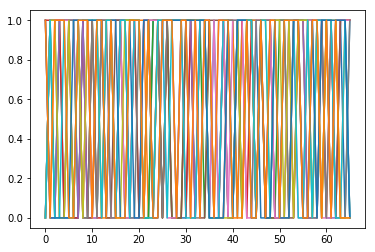

In [101]:
# plt.plot(mean_accuracy_list)
# plt.show()